# Boosting Algerian Agricultural Company Profits

<font color="#fcd695"> The goal from this project is to predict whether investing money in a certain product familly in a certain periode of the year is beneficial for the company or not and to see which products are sold to gather. In other words, we want to dectect how to boost the profit of Algerian Agricultural Company by buying the right products at the right time </strong></font>


## 1 Steps Of The Project:

### 1.1 Understand the Business/Research Context:

<font color="#ffe9c4">Gain a deep understanding of the business or research context. Understand the domain, business goals, and specific challenges.</font>

### 1.2 Data presentation:

<font color="#ffe9c4">
The dataset is csv file that contains a comprehensive dataset capturing various transactions within an agriculture company.The dataset has this features: 


 </font>

 | Column                  | Description                                              |
|-------------------------|----------------------------------------------------------|
| CleEffet                | Identifier for transactions.                             |
| Date                    | Date of the transaction.                                  |
| TypeEffet               | Type of transaction.                                      |
| FamilleArticle          | Family/category of the transaction product.              |
| CodeProduit             | Product code.                                            |
| ReferenceProduit        | Reference code for the product.                           |
| NLot                    | Lot number.                                              |
| Produit_Designation     | Original designation of the product of a transaction detail.|
| DetailEffet_Designation | Designation (sometimes different from Produit_Designation) of a transaction detail.|
| Quantite                | Quantity of the product.                                  |
| PrixAchat               | Purchase price.                                         |
| PrixUnitaireTTC         | Unit price including taxes.                              |
| DetailEffet_Marge       | Margin for the transaction detail.                        |
| Effet_Marge             | Margin for the transaction.                               |
| MontantHT               | Transaction amount excluding taxes.                      |
| Payement                | Payment amount.                                          |



<font color="#ffe9c4">
First in order to work with our dataset we should first import all the libreries that we will need in entry project and then get the dataset in pandas dataframe format 

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
import openpyxl

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

In [54]:
data = pd.read_csv("./Project_datamining_final_data_03_12_an1.csv")

<font color="#ffe9c4">
After that we should also know of what type are the attributes of the dataset

In [55]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261001 entries, 0 to 261000
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CleEffet                 261001 non-null  int64  
 1   Date                     261001 non-null  object 
 2   TypeEffet                261001 non-null  object 
 3   FamilleArticle           261001 non-null  object 
 4   Code Produit             160237 non-null  object 
 5   Reference Produit        135717 non-null  object 
 6   NLot                     228637 non-null  object 
 7   Produit_Designation      261001 non-null  object 
 8   DetailEffet_Designation  261001 non-null  object 
 9   Quantite                 261001 non-null  float64
 10  PrixAchat                261001 non-null  object 
 11  PrixUnitaireTTC          261001 non-null  object 
 12  DetailEffet_Marge        261001 non-null  object 
 13  Effet_Marge              261001 non-null  object 
 14  Mont

First, we worked to change the type of attributes so we can work with them

### 1.4 Exploratory Data Analysis (EDA) (Before Cleaning):

<font color="#ffe9c4">Explore the data to gain insights and an initial understanding of its characteristics. This may involve the use of statistical summaries, visualizations, and other exploratory techniques.</font>

we want to know the differente types of the product familly we have


In [56]:
# Data Types Assingment
data['CleEffet'] = data['CleEffet'].astype(str)
data['Date'] = pd.to_datetime(data['Date'], format = '%m/%d/%Y')
data['TypeEffet'] = data['TypeEffet'].astype(str)
data['FamilleArticle'] = data['FamilleArticle'].astype(str)
data['Code Produit'] = data['Code Produit'].astype(str)
data['Reference Produit'] = data['Reference Produit'].astype(str)
data['NLot'] = data['NLot'].astype(str)
data['Produit_Designation'] = data['Produit_Designation'].astype(str)
data['DetailEffet_Designation'] = data['DetailEffet_Designation'].astype(str)
data['Code Produit'] = data['Code Produit'].astype(str)
data['PrixAchat'] = data['PrixAchat'].str.replace(',', '').astype('float64')
data['PrixUnitaireTTC'] = data['PrixUnitaireTTC'].str.replace(',', '').astype('float64')
data['DetailEffet_Marge'] = data['DetailEffet_Marge'].str.replace(',', '').astype('float64')
data['Effet_Marge'] = data['Effet_Marge'].str.replace(',', '').astype('float64')
data['MontantHT'] = data['MontantHT'].str.replace(',', '').astype('float64')
data['Payement'] = data['Payement'].str.replace(',', '').astype('float64')

c:\Users\djbra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\djbra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\djbra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


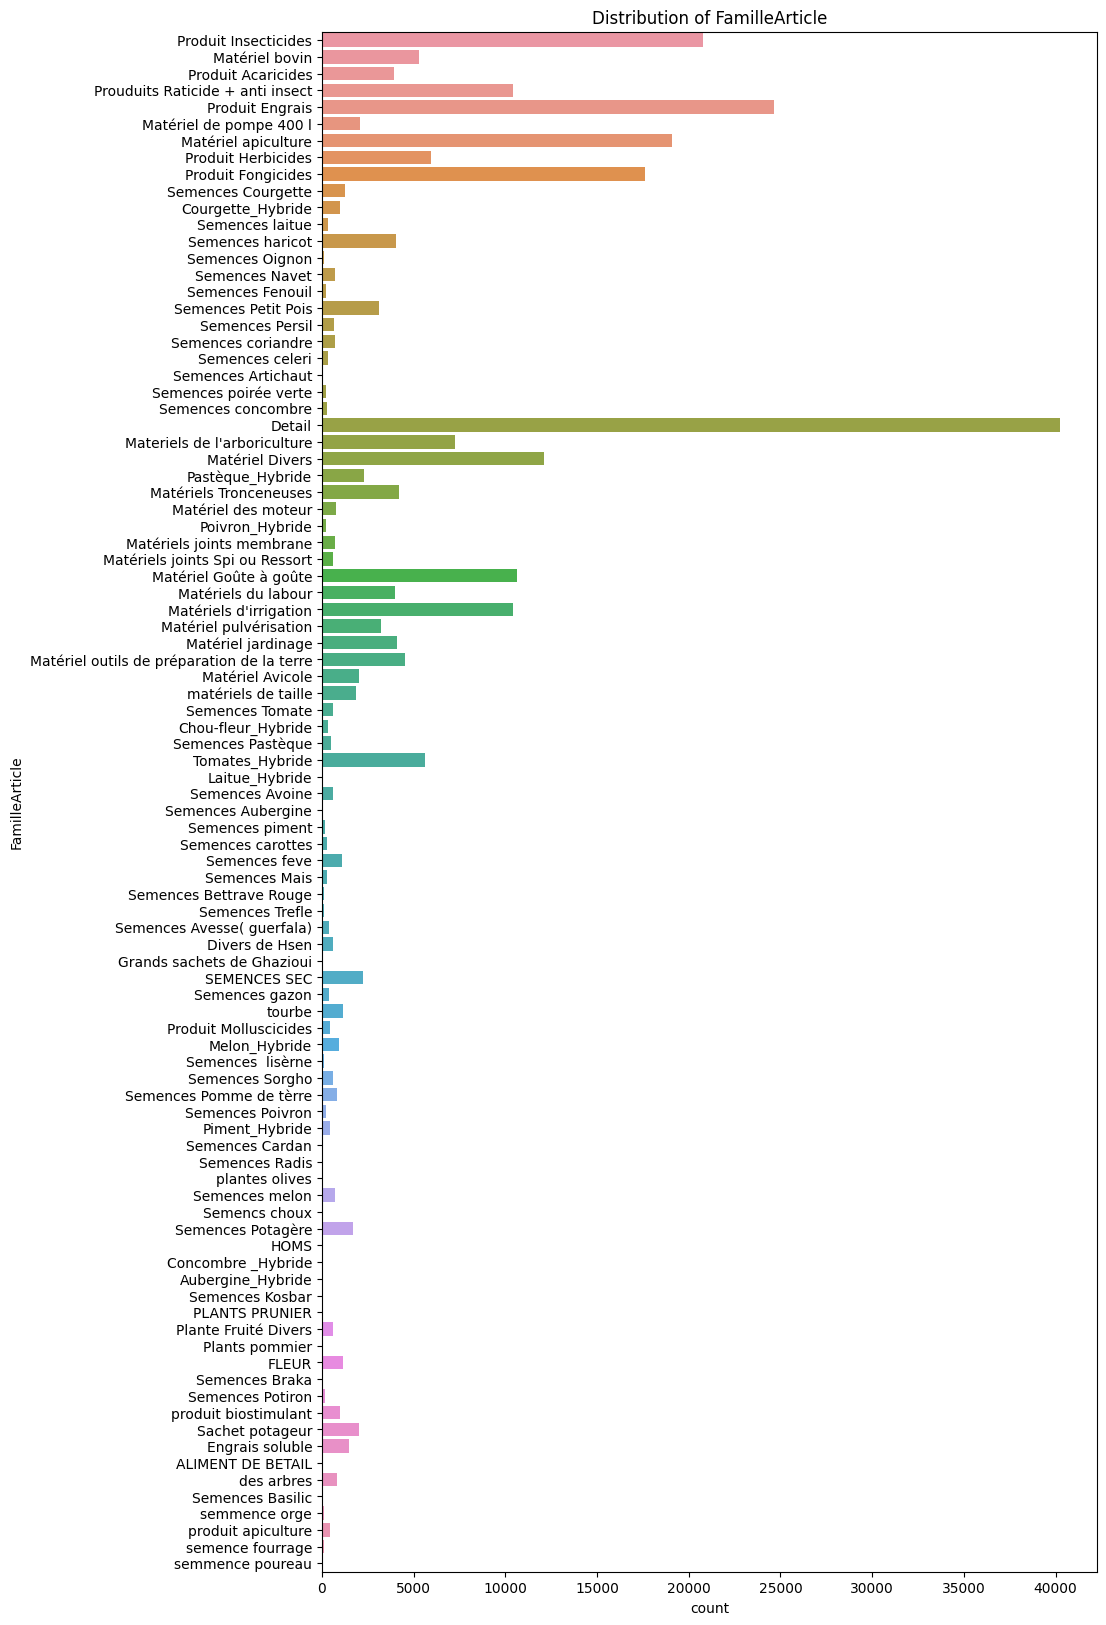

In [57]:
# Count plot for 'FamilleArticle'
plt.figure(figsize=(10, 20))
sns.countplot(y='FamilleArticle', data=data)
plt.title('Distribution of FamilleArticle')
plt.show()

In the rest of our work we will be interested only with sellings so we need to know which type of bills we will work with

TypeEffet
Bon de livraison    223143
Bon de réception     18098
Bon de sortie        11451
Bon d'entrée          8309
Name: count, dtype: int64


c:\Users\djbra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\djbra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\djbra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


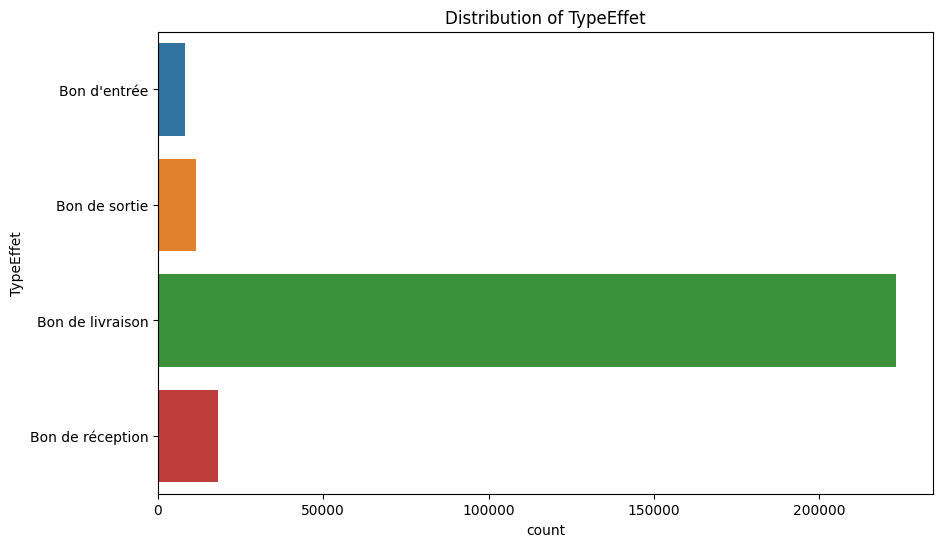

In [58]:
print(data['TypeEffet'].value_counts())
# Count plot for 'TypeEffet'
plt.figure(figsize=(10, 6))
sns.countplot(y='TypeEffet', data=data)
plt.title('Distribution of TypeEffet')
plt.show()

In [59]:
# counting the number of instances of each TypeEffet
data['TypeEffet'].value_counts()

TypeEffet
Bon de livraison    223143
Bon de réception     18098
Bon de sortie        11451
Bon d'entrée          8309
Name: count, dtype: int64

In [60]:

data['Month'] = data['Date'].dt.month

# Group by 'FamilleArticle' and 'Month' and sum the 'DetailEffet_Marge' for each group
grouped = data.groupby(['FamilleArticle', 'Month'])['DetailEffet_Marge'].sum().reset_index()

# Splitting categories into groups of 10 for plotting
categories = grouped['FamilleArticle'].unique()

for i in range(len(categories) // 10 + 1):
    plt.figure(figsize=(10, 6))
    
    for j in range(i * 10, min((i + 1) * 10, len(categories))):
        plt.title(f'Categories {i * 10 + 1} to {min((i + 1) * 10, len(categories))}')
        
        category = categories[j]
        category_data = grouped[grouped['FamilleArticle'] == category]
        plt.plot(category_data['Month'], category_data['DetailEffet_Marge'], label=category)
        
        plt.xlabel('Months')
        plt.ylabel('DetailEffet_Marge')
    
    plt.legend()
    plt.tight_layout()
    
    # Save each set of 10 categories as an individual image file
    plt.savefig(f'effetMargeBeforeCleaning/plot_categories_{i * 10 + 1}_to_{min((i + 1) * 10, len(categories))}.png')
    plt.close()  # Close the current figure to prevent overlapping plots

### 1.3 Data Cleaning and Preprocessing:

<font color="#ffe9c4">At this stages we should improve the quality of our data, and make it easy to use and work with by doing the following:</font>

#### 1.3.1 Data Cleanning:
<font color="#ffe9c4">Clean the raw data by handling missing values, outliers, and inconsistencies.</font>


first we will check for messing values in our data

In [61]:
# missing values
missing_values = data.isnull().sum()
print(missing_values)


CleEffet                   0
Date                       0
TypeEffet                  0
FamilleArticle             0
Code Produit               0
Reference Produit          0
NLot                       0
Produit_Designation        0
DetailEffet_Designation    0
Quantite                   0
PrixAchat                  0
PrixUnitaireTTC            0
DetailEffet_Marge          0
Effet_Marge                0
MontantHT                  0
Payement                   0
Month                      0
dtype: int64


So we don't have messing values lets see if there is duplicate values

In [62]:
# duplicate values
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

       CleEffet       Date         TypeEffet                FamilleArticle  \
363         164 2012-08-28      Bon d'entrée            Semences concombre   
399         184 2012-08-29      Bon d'entrée            Produit Fongicides   
401         185 2012-08-29      Bon d'entrée            Produit Fongicides   
422         193 2012-08-29      Bon d'entrée            Produit Fongicides   
443         204 2012-08-29      Bon d'entrée            Produit Fongicides   
...         ...        ...               ...                           ...   
205659    58065 2020-07-25     Bon de sortie           Matériel apiculture   
208764    58624 2020-09-30  Bon de livraison  Materiels de l'arboriculture   
208937    58641 2020-10-03     Bon de sortie                 Semences feve   
208938    58641 2020-10-03     Bon de sortie                 Semences feve   
255826    67243 2022-05-25  Bon de livraison                        Detail   

       Code Produit Reference Produit         NLot Produit_Desi

Those instances cannot be considered as duplicates so we won't bother with them

#### 1.3.2 Data Preprocessing:
<font color="#ffe9c4">Preprocess the data to transform it into a suitable format (type) for analysis since most of our data are of type object. This step include also normalization, standardization, and encoding categorical variables and also transforming the attributes names and content to english since they are written in french.</font>

As said before our goal from the project is to predict whether investing money in a certain product familly in a certain periode of the year is beneficial for the company or not.So we will be interested with the TypeEffet='Bon de livraison'

In [63]:
dataLivraison = data[data['TypeEffet'] == 'Bon de livraison']

In the generated tables we found out that some product familly have an negative total profit as example "Courgette_Hybride" <strong>(we should move it to cleaning i think)</strong>

In [64]:
dataLivraison[dataLivraison['FamilleArticle'] == 'Courgette_Hybride']
dataLivraison.query('FamilleArticle == "Courgette_Hybride" and Effet_Marge < 0')

,CleEffet,Date,TypeEffet,FamilleArticle,Code Produit,Reference Produit,NLot,Produit_Designation,DetailEffet_Designation,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,Month
46409,28007,2014-08-05,Bon de livraison,Courgette_Hybride,0204-013,0204,11585885,Produit_Anon_1470,Detail_Anon_5463,1.0,3200.00,3550.0,2.790900e+02,-2.604944e+04,133290.0,132504.99,8
46423,28007,2014-08-05,Bon de livraison,Courgette_Hybride,0204-012,0204,F25026120101T0,Produit_Anon_1469,Detail_Anon_3874,1.0,5800.00,6200.0,3.891600e+02,-2.604944e+04,133290.0,132504.99,8
54626,29942,2015-02-07,Bon de livraison,Courgette_Hybride,0104-011,0104,4 A 0351/5,Produit_Anon_157,Detail_Anon_157,1.0,2400.00,2900.0,-4.000000e+10,-3.999994e+10,501944.0,501409.00,2
56270,30194,2015-03-12,Bon de livraison,Courgette_Hybride,0104-007,0104,101726800,Produit_Anon_159,Detail_Anon_5971,2.0,6400.00,7000.0,1.122270e+03,-1.749042e+05,502490.0,499699.99,3
56836,30245,2015-03-19,Bon de livraison,Courgette_Hybride,0104-007,0104,101726800,Produit_Anon_159,Detail_Anon_5971,1.0,6400.00,7300.0,8.263000e+02,-8.395600e+02,594270.0,588270.00,3
56837,30245,2015-03-19,Bon de livraison,Courgette_Hybride,0104-007,0104,101726800,Produit_Anon_159,Detail_Anon_5971,1.0,6400.00,7100.0,6.283200e+02,-8.395600e+02,594270.0,588270.00,3
61230,30949,2015-05-05,Bon de livraison,Courgette_Hybride,0204-012,0204,F25026110101T1,Produit_Anon_1469,Detail_Anon_3874,1.0,5750.00,5062.5,-7.118300e+02,-2.847320e+03,20250.0,0.00,5
61231,30949,2015-05-05,Bon de livraison,Courgette_Hybride,0204-012,0204,F25026120101T0,Produit_Anon_1469,Detail_Anon_3874,3.0,5800.00,5062.5,-2.135490e+03,-2.847320e+03,20250.0,0.00,5
206596,58231,2020-08-17,Bon de livraison,Courgette_Hybride,0204-012,0204,NO5814180201T0,Produit_Anon_1469,Detail_Anon_9836,2.0,8849.99,9500.0,2.935000e+03,-2.065000e+03,89000.0,0.00,8
207908,58464,2020-09-16,Bon de livraison,Courgette_Hybride,0204-012,0204,NO5814180201T0,Produit_Anon_1469,Detail_Anon_9836,2.0,8849.99,9000.0,1.900200e+03,-7.115156e+04,124140.0,0.00,9


Since the 'PrixAchat' variable is not confidential we want to extract the corrupted data instances. So that we can correct them later   

In [65]:
dataLivraison.query('(PrixUnitaireTTC - PrixAchat) * Quantite != DetailEffet_Marge' )

,CleEffet,Date,TypeEffet,FamilleArticle,Code Produit,Reference Produit,NLot,Produit_Designation,DetailEffet_Designation,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,Month
623,340,2012-09-03,Bon de livraison,Detail,DET,DET,no lot,Produit_Anon_259,Detail_Anon_268,1.0,126.0,300.0,299.00,299.00,300.0,0.0,9
624,341,2012-09-03,Bon de livraison,Detail,DET,DET,no lot,Produit_Anon_259,Detail_Anon_268,150.0,126.0,1.0,0.00,0.00,150.0,0.0,9
2166,540,2012-09-08,Bon de livraison,Matériels Tronceneuses,30036,30000,no lot,Produit_Anon_465,Detail_Anon_480,1.0,180.0,250.0,249.00,249.00,250.0,250.0,9
2172,546,2012-09-08,Bon de livraison,Detail,DET,DET,no lot,Produit_Anon_259,Detail_Anon_268,6.0,126.0,250.0,1494.00,1494.00,1500.0,1500.0,9
2173,547,2012-09-08,Bon de livraison,Produit Insecticides,0305-045,0305,111008,Produit_Anon_27,Detail_Anon_27,1.0,1200.0,500.0,-9515.13,-18498.00,1550.0,1500.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260989,68345,2022-07-27,Bon de livraison,Produit Engrais,00067,nan,1330328,Produit_Anon_6772,Detail_Anon_10819,1.0,9075.0,11000.0,1906.21,9758.58,101765.0,0.0,7
260990,68345,2022-07-27,Bon de livraison,Semences haricot,nan,nan,G2201129,Produit_Anon_2228,Detail_Anon_6197,3.0,11000.0,11500.0,1120.30,9758.58,101765.0,0.0,7
260991,68345,2022-07-27,Bon de livraison,Produit Insecticides,0305-039,0305,l211006,Produit_Anon_2,Detail_Anon_11982,1.0,2400.0,2900.0,514.24,9758.58,101765.0,0.0,7
260992,68345,2022-07-27,Bon de livraison,Courgette_Hybride,nan,nan,GS834-30-322,Produit_Anon_7114,Detail_Anon_11731,5.0,4300.0,4500.0,752.37,9758.58,101765.0,0.0,7


The corrupted data instances found before here we are going to fix their 'DetailEffet_Marge'.so first we should first find the correct onces and calculate what is known as unitMargin 

In [66]:
correct_marge=dataLivraison.query('(PrixUnitaireTTC - PrixAchat)  == DetailEffet_Marge/Quantite' )
correct_marge['unitMargin'] = correct_marge['DetailEffet_Marge'] / correct_marge['Quantite']

C:\Users\djbra\AppData\Local\Temp\ipykernel_6420\3639213523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_marge['unitMargin'] = correct_marge['DetailEffet_Marge'] / correct_marge['Quantite']


c:\Users\djbra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


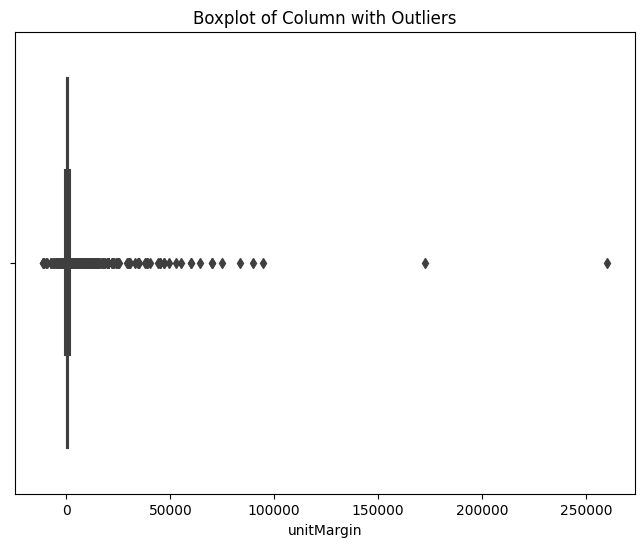

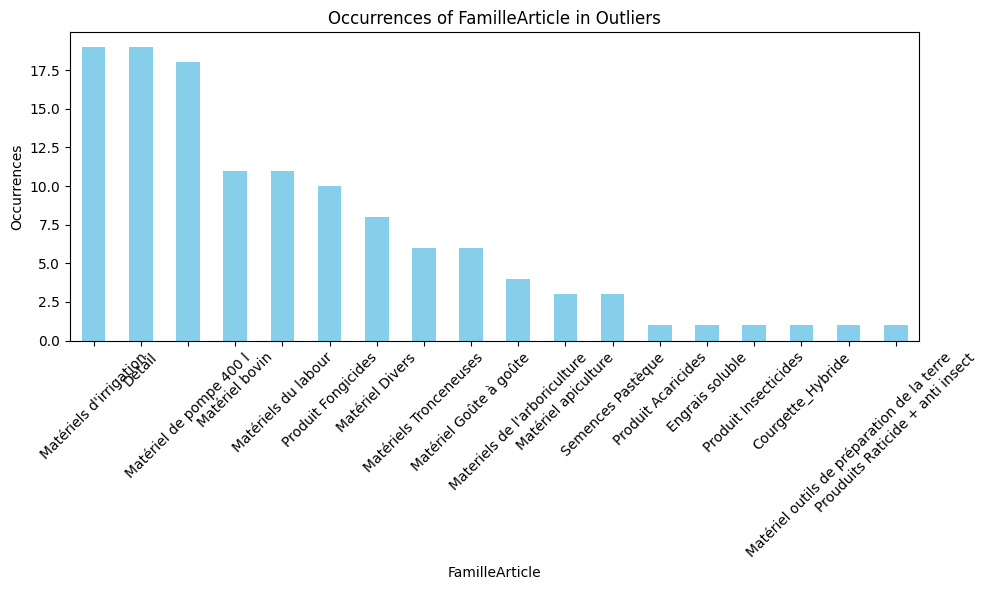

In [67]:
# outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=correct_marge['unitMargin'])
plt.title('Boxplot of Column with Outliers')
plt.show()

# Detect outliers using z-score method and display them
z_scores = stats.zscore(correct_marge['unitMargin'])
threshold = 3
outliers_indices = correct_marge.index[(z_scores > threshold)]
outliers = correct_marge.loc[outliers_indices, ['FamilleArticle', 'DetailEffet_Marge', 'Quantite', 'unitMargin']]
outliers_sorted = outliers.sort_values(by='unitMargin', ascending=False)

article_counts = outliers_sorted['FamilleArticle'].value_counts()

# Plotting histogram of 'FamilleArticle' occurrences
plt.figure(figsize=(10, 6))
article_counts.plot(kind='bar', color='skyblue')
plt.title('Occurrences of FamilleArticle in Outliers')
plt.xlabel('FamilleArticle')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [68]:
correct_marge.describe()

,Date,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,Month,unitMargin
count,22312,22312.000000,22312.000000,22312.000000,22312.000000,22312.000000,2.231200e+04,2.231200e+04,22312.000000,22312.000000
mean,2017-08-19 08:32:38.121190400,13.341101,4012.585261,4777.003858,2339.053531,7980.931328,5.719730e+04,2.096129e+04,5.768421,764.418597
min,2010-03-01 00:00:00,0.010000,1.000000,0.000000,-102000.000000,-873326.680000,0.000000e+00,0.000000e+00,1.000000,-11250.000000
25%,2014-05-31 00:00:00,1.000000,750.000000,950.000000,300.000000,1200.000000,7.500000e+03,0.000000e+00,4.000000,150.000000
50%,2018-03-03 00:00:00,2.000000,1800.000000,2250.000000,800.000000,3679.880000,2.300000e+04,0.000000e+00,5.000000,350.000000
75%,2020-03-29 00:00:00,5.000000,4500.000000,5200.000000,2050.000000,9000.000000,6.247000e+04,1.121000e+04,7.000000,731.250000
max,2022-07-28 00:00:00,16000.000000,378000.000000,472500.000000,521885.000000,554400.260000,4.419000e+06,3.600000e+06,12.000000,260000.000000
std,NaN,169.057079,10237.463935,12377.668518,9598.520677,19196.725732,1.217756e+05,7.501396e+04,2.768886,3190.748007


In [69]:
# some examples to see
correct_marge.loc[correct_marge['Quantite'] == 0.010000]
correct_marge.loc[correct_marge['DetailEffet_Marge'] == -102000]
correct_marge.loc[correct_marge['MontantHT'] == 4.419000e+06]
correct_marge.loc[correct_marge['Payement'] == 3.600000e+06]
dataLivraison.loc[dataLivraison['CleEffet'] == '8460']

,CleEffet,Date,TypeEffet,FamilleArticle,Code Produit,Reference Produit,NLot,Produit_Designation,DetailEffet_Designation,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,Month
12105,8460,2013-03-13,Bon de livraison,Pastèque_Hybride,11615685,0203,10526334,Produit_Anon_393,Detail_Anon_1439,40.0,5400.0,5400.0,0.0,-73932.1,4419000.0,0.0,3
12106,8460,2013-03-13,Bon de livraison,Pastèque_Hybride,0203-007,0203,3008595,Produit_Anon_394,Detail_Anon_2476,10.0,6750.0,4500.0,6017.9,-73932.1,4419000.0,0.0,3
12107,8460,2013-03-13,Bon de livraison,tourbe,12008,12000,no lot,Produit_Anon_1690,Detail_Anon_1669,100.0,1080.0,1080.0,10050.0,-73932.1,4419000.0,0.0,3
12108,8460,2013-03-13,Bon de livraison,Pastèque_Hybride,0203-038,0203,10678493,Produit_Anon_2086,Detail_Anon_2303,900.0,4600.0,4500.0,-90000.0,-73932.1,4419000.0,0.0,3


And here for each famille in the correct data we calculate the average of the unitMargin and then we will use them in the correction process of the corrupted data

In [70]:
averagebyfamille = correct_marge.groupby('FamilleArticle')['unitMargin'].mean().reset_index()
averagebyfamille_sorted = averagebyfamille.sort_values('unitMargin', ascending=False)
averagebyfamille_sorted

,FamilleArticle,unitMargin
16,Matériel de pompe 400 l,2977.002299
15,Matériel bovin,2844.457251
41,Semences lisèrne,2539.583333
22,Matériels d'irrigation,1906.696171
23,Matériels du labour,1616.901890
...,...,...
9,HOMS,19.166667
58,Semences Pomme de tèrre,8.657895
83,semmence orge,6.000000
79,plantes olives,0.000000


and finally we left we our fully corrected data 'fixedData'

In [71]:
fixedData = dataLivraison
fixedData['DetailEffet_Marge'] = fixedData['FamilleArticle'].map(averagebyfamille.set_index('FamilleArticle')['unitMargin']) * fixedData['Quantite']
fixedData.head()
fixedData.describe()


C:\Users\djbra\AppData\Local\Temp\ipykernel_6420\30993091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixedData['DetailEffet_Marge'] = fixedData['FamilleArticle'].map(averagebyfamille.set_index('FamilleArticle')['unitMargin']) * fixedData['Quantite']


,Date,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,Month
count,223143,223143.000000,223143.000000,223143.000000,2.230750e+05,2.231430e+05,2.231430e+05,2.231430e+05,223143.000000
mean,2017-12-02 06:07:23.823019520,12.099271,2225.001188,2618.948728,7.969003e+03,-6.779440e+06,2.308019e+05,1.694300e+05,5.875658
min,2010-03-01 00:00:00,0.000000,0.000000,0.000000,-7.095000e+04,-3.999994e+10,0.000000e+00,0.000000e+00,1.000000
25%,2015-08-30 00:00:00,1.000000,130.000000,250.000000,7.071981e+02,5.578680e+03,3.690000e+04,0.000000e+00,3.000000
50%,2018-01-18 00:00:00,2.000000,632.500000,850.000000,1.548645e+03,2.565007e+04,1.802650e+05,6.546000e+04,5.000000
75%,2020-04-21 00:00:00,4.000000,2475.000000,2900.000000,3.097291e+03,4.825951e+04,3.413040e+05,2.800810e+05,8.000000
max,2022-07-28 00:00:00,40000.000000,378000.000000,718500.000000,3.948462e+07,2.900277e+06,2.000000e+07,3.600000e+06,12.000000
std,NaN,147.832150,5929.658180,7449.916125,1.239285e+05,5.219439e+08,2.429736e+05,2.345190e+05,3.200683


we need to drop the columns that we are not interested in 


In [72]:
fixedData = fixedData.drop(columns=['TypeEffet', 'Code Produit', 'Reference Produit', 'NLot','DetailEffet_Designation', 'PrixAchat'])
fixedData

,CleEffet,Date,FamilleArticle,Produit_Designation,Quantite,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,Month
623,340,2012-09-03,Detail,Produit_Anon_259,1.0,300.0,1548.645280,299.00,300.0,0.0,9
624,341,2012-09-03,Detail,Produit_Anon_259,150.0,1.0,232296.792000,0.00,150.0,0.0,9
2166,540,2012-09-08,Matériels Tronceneuses,Produit_Anon_465,1.0,250.0,1447.671756,249.00,250.0,250.0,9
2172,546,2012-09-08,Detail,Produit_Anon_259,6.0,250.0,9291.871680,1494.00,1500.0,1500.0,9
2173,547,2012-09-08,Produit Insecticides,Produit_Anon_27,1.0,500.0,516.555515,-18498.00,1550.0,1500.0,9
...,...,...,...,...,...,...,...,...,...,...,...
260996,68349,2022-07-28,Produit Insecticides,Produit_Anon_7385,2.0,1000.0,1033.111031,500.00,2000.0,0.0,7
260997,68350,2022-07-28,Produit Fongicides,Produit_Anon_6074,1.0,4900.0,889.934398,808.51,4900.0,0.0,7
260998,68351,2022-07-28,Matériel bovin,Produit_Anon_413,1.0,3500.0,2844.457251,1750.00,3500.0,0.0,7
260999,68352,2022-07-28,Pastèque_Hybride,Produit_Anon_7280,3.0,9700.0,1470.510949,3000.00,29100.0,0.0,7


### 1.4 Exploratory Data Analysis (EDA) (After Cleaning):

<font color="#ffe9c4">Explore the data to gain insights and an initial understanding of its characteristics. This may involve the use of statistical summaries, visualizations, and other exploratory techniques.</font>

first we want to see the sum profit(DetailEffet_Marge) of each product familly from 2012 unitl 2020 in each month so we can know which product familly has the best profit in a certain month 

In [73]:
grouped = fixedData.groupby(['FamilleArticle', 'Month'])['DetailEffet_Marge'].sum().reset_index()

categories = grouped['FamilleArticle'].unique()

for i in range(len(categories) // 10 + 1):
    plt.figure(figsize=(10, 6))
    
    for j in range(i * 10, min((i + 1) * 10, len(categories))):
        plt.title(f'Categories {i * 10 + 1} to {min((i + 1) * 10, len(categories))}')
        
        category = categories[j]
        category_data = grouped[grouped['FamilleArticle'] == category]
        plt.plot(category_data['Month'], category_data['DetailEffet_Marge'], label=category)
        
        plt.xlabel('Months')
        plt.ylabel('DetailEffet_Marge')
    
    plt.legend()
    plt.tight_layout()
    
    plt.savefig(f'effetMargeAfterFixing/plot_categories_{i * 10 + 1}_to_{min((i + 1) * 10, len(categories))}.png')
    plt.close()  

And to make things clearer we will put for each month of the year a table that contains the average profit of each product familly and its purcentage from the whole profit of the month and rank them decreasingly.We have also added that if the a certain famille article is beneficial in a certain month of the year by seeing if its percentage is greater than a 5%

In [74]:
# Define a custom function to sort the DataFrame within each group
def sort_by_detail_marge(group):
    return group.sort_values(by='DetailEffet_Marge', ascending=False)

# Define a function to determine profitability
def is_profitable(percentage):
    return "Yes" if percentage > 5 else "No"


fixedData['Year'] = fixedData['Date'].dt.year

grouped = fixedData.groupby(['FamilleArticle', 'Month', 'Year'])['DetailEffet_Marge'].sum().reset_index()
average_grouped = grouped.groupby(['FamilleArticle', 'Month'])['DetailEffet_Marge'].mean().reset_index()

# Apply the custom function to each group within each month
sorted_grouped = average_grouped.groupby('Month', group_keys=False).apply(sort_by_detail_marge)

# Iterate over each month
for month, month_group in sorted_grouped.groupby('Month'):
    # Calculate the percentage column and round to two decimal places
    month_group['Percentage'] = (month_group['DetailEffet_Marge'] / month_group['DetailEffet_Marge'].sum() * 100).round(2)

    # Determine profitability for each 'FamilleArticle'
    month_group['Profitable'] = month_group['Percentage'].apply(is_profitable)

    # Round 'DetailEffet_Marge' to two decimal places
    month_group['DetailEffet_Marge'] = month_group['DetailEffet_Marge'].round(2)

    # Create a table using matplotlib
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')

    # Include 'Percentage' and 'Profitable' columns in the table
    table_data = month_group[['FamilleArticle', 'DetailEffet_Marge', 'Percentage', 'Profitable']].values
    col_labels = ['FamilleArticle', 'DetailEffet_Marge', 'Percentage', 'Profitable']
    ax.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='center')

    # Save the table as a PDF file
    pdf_filename = f'fixedtables/table_{month}.pdf'
    plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
    plt.close()

# Define the profitability function
def is_profitable(marge, famille_article, month):
    # Find the average marge for the given 'FamilleArticle' and 'Month'
    avg_marge = average_grouped[(average_grouped['FamilleArticle'] == famille_article) & (average_grouped['Month'] == month)]['DetailEffet_Marge'].iloc[0]
    percentage = (marge / avg_marge) * 100
    return "Yes" if percentage > 5 else "No"

# Apply the function to the original data
fixedData['Profitability'] = fixedData.apply(lambda row: is_profitable(row['DetailEffet_Marge'], row['FamilleArticle'], row['Month']), axis=1)

fixedData

C:\Users\djbra\AppData\Local\Temp\ipykernel_6420\3354346654.py:48: RuntimeWarning: invalid value encountered in scalar divide
  percentage = (marge / avg_marge) * 100


,CleEffet,Date,FamilleArticle,Produit_Designation,Quantite,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,Month,Year,Profitability
623,340,2012-09-03,Detail,Produit_Anon_259,1.0,300.0,1548.645280,299.00,300.0,0.0,9,2012,No
624,341,2012-09-03,Detail,Produit_Anon_259,150.0,1.0,232296.792000,0.00,150.0,0.0,9,2012,Yes
2166,540,2012-09-08,Matériels Tronceneuses,Produit_Anon_465,1.0,250.0,1447.671756,249.00,250.0,250.0,9,2012,No
2172,546,2012-09-08,Detail,Produit_Anon_259,6.0,250.0,9291.871680,1494.00,1500.0,1500.0,9,2012,No
2173,547,2012-09-08,Produit Insecticides,Produit_Anon_27,1.0,500.0,516.555515,-18498.00,1550.0,1500.0,9,2012,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260996,68349,2022-07-28,Produit Insecticides,Produit_Anon_7385,2.0,1000.0,1033.111031,500.00,2000.0,0.0,7,2022,No
260997,68350,2022-07-28,Produit Fongicides,Produit_Anon_6074,1.0,4900.0,889.934398,808.51,4900.0,0.0,7,2022,No
260998,68351,2022-07-28,Matériel bovin,Produit_Anon_413,1.0,3500.0,2844.457251,1750.00,3500.0,0.0,7,2022,No
260999,68352,2022-07-28,Pastèque_Hybride,Produit_Anon_7280,3.0,9700.0,1470.510949,3000.00,29100.0,0.0,7,2022,Yes


In addition to that we added a graph to show the evolution of the profit for each famille article over the periode of 10 years

In [75]:
# Group by 'FamilleArticle' and 'Year' and calculate the sum of 'DetailEffet_Marge' for each group
evolution_data = grouped.groupby(['FamilleArticle', 'Year'])['DetailEffet_Marge'].sum().reset_index()

# Create an evolution graph for each 'FamilleArticle'
for famille, famille_group in evolution_data.groupby('FamilleArticle'):
    plt.figure(figsize=(10, 6))
    plt.plot(famille_group['Year'], famille_group['DetailEffet_Marge'], marker='o', label=famille)
    plt.title(f'Evolution of DetailEffet_Marge for {famille} over Time')
    plt.xlabel('Year')
    plt.ylabel('DetailEffet_Marge Sum')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'evolution_famille/{famille}.png')
    plt.close()


### 1.4 Classification Model (trainning and evalution):

<font color="#ffe9c4">We want to predict the 'Profitability' of certain 'FamilleArticle' in a cretain Month of the Year. So we are creating a classification model that do this job.</font>

#### 1.4.1 model 1:

In [76]:
X = fixedData[['FamilleArticle', 'Month', 'Year']]

Y = fixedData['Profitability']

# One-hot encode the categorical variable 'FamilleArticle'
X = pd.get_dummies(X, columns=['FamilleArticle'], drop_first=True)

# Use stratified shuffle split
stratified_splitter = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)

# Use the splitter to get training and testing indices
for train_index, test_index in stratified_splitter.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

# Create and train a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.94
Confusion Matrix:
[[40145   389]
 [ 2307  1788]]
Classification Report:
              precision    recall  f1-score   support

          No       0.95      0.99      0.97     40534
         Yes       0.82      0.44      0.57      4095

    accuracy                           0.94     44629
   macro avg       0.88      0.71      0.77     44629
weighted avg       0.93      0.94      0.93     44629



#### 1.4.2 Test model 1:

In [78]:
example_data = pd.DataFrame(0, columns=X.columns, index=[0])

example_data['Month'] = 3
example_data['Year'] = 2017

example_data['FamilleArticle_Detail'] = 1

# Make a prediction using the trained model
prediction = model.predict(example_data)

print(f'The prediction for FamilleArticle: Detail, Month: 9 is: {prediction[0]}')


The prediction for FamilleArticle: Detail, Month: 9 is: No


#### 1.4.3 model 2:

In [79]:
X = fixedData[['FamilleArticle', 'Month', 'Year']]

Y = fixedData['Profitability']

# One-hot encode the categorical variable 'FamilleArticle'
X = pd.get_dummies(X, columns=['FamilleArticle'], drop_first=True)

y = Y.map({'No': 0, 'Yes': 1})

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y)
class_weight = {0: class_weights[0], 1: class_weights[1]}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree model with class weights
model = DecisionTreeClassifier(random_state=42, class_weight=class_weight)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.84
Confusion Matrix:
[[34366  6084]
 [  859  3320]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     40450
           1       0.35      0.79      0.49      4179

    accuracy                           0.84     44629
   macro avg       0.66      0.82      0.70     44629
weighted avg       0.92      0.84      0.87     44629



#### 1.4.4 Test model 2:

In [80]:
example_data = pd.DataFrame(0, columns=X.columns, index=[0])


example_data['Month'] = 1
example_data['Year'] = 2024


example_data['FamilleArticle_Detail'] = 1

# Make a prediction using the trained model
prediction = model.predict(example_data)

print(f'The prediction for FamilleArticle: Detail, Month: {1}, Year: {2024} is: {prediction[0]}')


The prediction for FamilleArticle: Detail, Month: 1, Year: 2024 is: 0


#### 1.4.5 model 3:

In [81]:
X = fixedData[['FamilleArticle', 'Month', 'Year']]

Y = fixedData['Profitability']

# Encode the categorical variable using LabelEncoder
label_encoder = LabelEncoder()
X['FamilleArticle'] = label_encoder.fit_transform(X['FamilleArticle'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Hyperparameter tuning using Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


C:\Users\djbra\AppData\Local\Temp\ipykernel_6420\1352476408.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['FamilleArticle'] = label_encoder.fit_transform(X['FamilleArticle'])


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy: 0.94
Confusion Matrix:
[[40083   367]
 [ 2333  1846]]
Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.99      0.97     40450
         Yes       0.83      0.44      0.58      4179

    accuracy                           0.94     44629
   macro avg       0.89      0.72      0.77     44629
weighted avg       0.93      0.94      0.93     44629



#### 1.4.6 Test model 3:

In [82]:
# Example data
example_data = pd.DataFrame({'FamilleArticle': ['Detail'], 'Month': [1], 'Year': [2023]})

# Encode the categorical variable using the same LabelEncoder
example_data['FamilleArticle'] = label_encoder.transform(example_data['FamilleArticle'])


# Make a prediction using the trained model
prediction = best_model.predict(example_data)

print(f'The prediction for FamilleArticle: Detail, Month: 1 is: {prediction[0]}')


The prediction for FamilleArticle: Detail, Month: 1 is: No


Example of using the model for prediction

### 1.4 Association Rule:

<font color="#ffe9c4">We want to know which products are sold togather frequently.</font>

We will first create a transactional DataFrame. We want to analyze each product sold within a given transaction on each date. However, the product sold are one in each row. Therefore, we should group all the products sold within  a transaction on a given date with the groupby operation provided in Pandas. 

In [83]:
df_transactions = fixedData.groupby(['CleEffet', 'Date'])[['Produit_Designation', 'FamilleArticle']].apply(lambda x: list(map(tuple, x.values.tolist()))).reset_index(name='transactions')
df_transactions.head()

,CleEffet,Date,transactions
0,10000,2013-04-08,"[(Produit_Anon_469, Matériels joints membrane)..."
1,10001,2013-04-08,"[(Produit_Anon_1532, Matériel Avicole)]"
2,10002,2013-04-08,"[(Produit_Anon_2230, Pastèque_Hybride)]"
3,10003,2013-04-08,"[(Produit_Anon_1057, Matériels d'irrigation), ..."
4,10004,2013-04-08,"[(Produit_Anon_19, Produit Insecticides)]"


Print the number of transactions and  the number of distinct customers and we found that are the same

In [84]:
print("Number of transactions:", len(df_transactions))
print("Number of distinct customers:", len(list(set(df_transactions["CleEffet"]))))

Number of transactions: 42739
Number of distinct customers: 42739



Creating a list containing all the transactions into a variable `transactions`.All the transactions are stored in the `transaction` column of the DataFrame `df_transactions`. 


In [85]:
transactions = df_transactions['transactions'].to_list()
transactions[:5]

[[('Produit_Anon_469', 'Matériels joints membrane'),
  ('Produit_Anon_946', 'Matériels du labour')],
 [('Produit_Anon_1532', 'Matériel Avicole')],
 [('Produit_Anon_2230', 'Pastèque_Hybride')],
 [('Produit_Anon_1057', "Matériels d'irrigation"),
  ('Produit_Anon_1825', "Matériels d'irrigation"),
  ('Produit_Anon_2176', "Matériels d'irrigation")],
 [('Produit_Anon_19', 'Produit Insecticides')]]

Encode the transactions into a **one-hot encoded transactional dataset**. Store the encoded dataset into a variable called `transaction_dataset`. We first create a TransactionEncoder() object and then, call the fit_transform() method on our transactions

In [86]:
te = TransactionEncoder()
transaction_dataset = te.fit(transactions).transform(transactions)
transaction_dataset

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Then we create a DataFrame from the one-hot encoded `transaction_dataset` and store the dataframe in a variable `df_transactions_onehot`. We set the columns of the dataframe to the `transaction_encoder.columns_` values.

In [87]:
df_transactions_onehot = pd.DataFrame(transaction_dataset, columns=te.columns_)
df_transactions_onehot.head()

,"(Produit_Anon_0, Produit Insecticides)","(Produit_Anon_1, Matériel bovin)","(Produit_Anon_10, Produit Insecticides)","(Produit_Anon_1001, Matériels d'irrigation)","(Produit_Anon_1002, Matériel pulvérisation)","(Produit_Anon_1004, Matériels d'irrigation)","(Produit_Anon_1005, Matériels du labour)","(Produit_Anon_1006, Matériels d'irrigation)","(Produit_Anon_1007, Matériels d'irrigation)","(Produit_Anon_1008, Matériels d'irrigation)",...,"(Produit_Anon_990, Matériels d'irrigation)","(Produit_Anon_991, Matériel des moteur)","(Produit_Anon_992, Matériel des moteur)","(Produit_Anon_993, Matériel des moteur)","(Produit_Anon_994, Matériels du labour)","(Produit_Anon_995, Matériels du labour)","(Produit_Anon_996, Matériels du labour)","(Produit_Anon_997, Matériels du labour)","(Produit_Anon_998, Matériels du labour)","(Produit_Anon_999, Matériels du labour)"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We apply the **Fpgrowth** algorithm on the datasted stored in `df_transactions_onehot` and then we set the value of the minimum support `min_support` to 0.01.  

In [88]:
df_freq_itemsets = fpgrowth(df_transactions_onehot, min_support=0.01, use_colnames=True)
df_freq_itemsets

,support,itemsets
0,0.041601,"((Produit_Anon_19, Produit Insecticides))"
1,0.032944,"((Produit_Anon_1475, Matériel Divers))"
2,0.126348,"((Produit_Anon_259, Detail))"
3,0.011676,"((Produit_Anon_2704, Produit Engrais))"
4,0.011816,"((Produit_Anon_315, Matériel apiculture))"
...,...,...
226,0.012728,"((Produit_Anon_5986, Sachet potageur), (Produi..."
227,0.012939,"((Produit_Anon_5626, Detail), (Produit_Anon_25..."
228,0.012705,"((Produit_Anon_259, Detail), (Produit_Anon_598..."
229,0.012424,"((Produit_Anon_5626, Detail), (Produit_Anon_59..."


We create a new column with the length of each transaction (i.e., the number of elements in each transaction).

In [89]:
df_freq_itemsets['length'] = df_freq_itemsets['itemsets'].apply(lambda x: len(x))
df_freq_itemsets

,support,itemsets,length
0,0.041601,"((Produit_Anon_19, Produit Insecticides))",1
1,0.032944,"((Produit_Anon_1475, Matériel Divers))",1
2,0.126348,"((Produit_Anon_259, Detail))",1
3,0.011676,"((Produit_Anon_2704, Produit Engrais))",1
4,0.011816,"((Produit_Anon_315, Matériel apiculture))",1
...,...,...,...
226,0.012728,"((Produit_Anon_5986, Sachet potageur), (Produi...",3
227,0.012939,"((Produit_Anon_5626, Detail), (Produit_Anon_25...",4
228,0.012705,"((Produit_Anon_259, Detail), (Produit_Anon_598...",4
229,0.012424,"((Produit_Anon_5626, Detail), (Produit_Anon_59...",4


We generate the association rules using `confidence` as metric and set the `min_threshold` to 0.01. We store the generated association rules in a DataFrame `df_ar`.

In [90]:
df_ar = association_rules(df_freq_itemsets, metric = 'confidence', min_threshold = 0.05)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"((Produit_Anon_19, Produit Insecticides))","((Produit_Anon_259, Detail))",0.041601,0.126348,0.030862,0.741845,5.871427,0.025605,3.384211,0.865698
1,"((Produit_Anon_259, Detail))","((Produit_Anon_19, Produit Insecticides))",0.126348,0.041601,0.030862,0.244259,5.871427,0.025605,1.268158,0.949673
2,"((Produit_Anon_19, Produit Insecticides))","((Produit_Anon_3445, Detail))",0.041601,0.049744,0.022134,0.532058,10.695977,0.020065,2.030716,0.945856
3,"((Produit_Anon_3445, Detail))","((Produit_Anon_19, Produit Insecticides))",0.049744,0.041601,0.022134,0.444967,10.695977,0.020065,1.726742,0.953961
4,"((Produit_Anon_19, Produit Insecticides))","((Produit_Anon_5626, Detail))",0.041601,0.049089,0.022088,0.530934,10.815812,0.020045,2.027243,0.946937
...,...,...,...,...,...,...,...,...,...,...
1835,"((Produit_Anon_5986, Sachet potageur))","((Produit_Anon_5626, Detail), (Produit_Anon_25...",0.016355,0.034231,0.012401,0.758226,22.150255,0.011841,3.994512,0.970730
1836,"((Produit_Anon_3901, Detail))","((Produit_Anon_259, Detail), (Produit_Anon_344...",0.055242,0.013313,0.012401,0.224481,16.861336,0.011665,1.272292,0.995697
1837,"((Produit_Anon_5626, Detail))","((Produit_Anon_259, Detail), (Produit_Anon_344...",0.049089,0.012705,0.012401,0.252622,19.883595,0.011777,1.321011,0.998734
1838,"((Produit_Anon_259, Detail))","((Produit_Anon_5626, Detail), (Produit_Anon_34...",0.126348,0.012424,0.012401,0.098148,7.899724,0.010831,1.095053,0.999727


We extract the transaction that the minimum confidence is 0.9 and the minimum lift is 10

In [91]:
strong_associations = df_ar[(df_ar['confidence'] >= 0.9) & (df_ar['lift'] >= 10)][['antecedents', 'consequents', 'confidence', 'lift']]

# Specify the path where you want to save the Excel file

# Save the DataFrame to an Excel file
strong_associations.to_excel( 'strong_associations.xlsx', index=False)


### 1.5 Conclusion:

<font color="#ffe9c4">After the full journey with our data it is time to summerize what we got from this study.</font>

#### 1.5.1 Conclusion:
#### 1.5.2 From the association rules(products purchassing paterns):



As we can observe in the file `strong_associations.xlsx` that the most common products that are bought together by customer are from the five `FamilleArticle` "Detail","Prouduits Raticide + anti insect","Matériel apiculture","Sachet potageur",and"Semences Potagère".the association rules generated by certain products of this `FamilleArticle` are confidential and reliable since they have very good metrics score (confidence>0.9 and lift>10) therefor we can benefit from this paterns of buying to make some reductions or something related to this.as an example:
<font color="#FF0000">
{('Produit_Anon_3445', 'Detail'), ('Produit_Anon_5627', 'Detail'), ('Produit_Anon_5986', 'Sachet potageur'), ('Produit_Anon_3901', 'Detail')} ---->
{('Produit_Anon_259', 'Detail'), ('Produit_Anon_5626', 'Detail')}</font>
has as confidence 0,98 and as lift 20.09